In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()


Saving dermatology.data to dermatology.data


In [3]:
import pandas as pd

# Load the dataset
column_names = [
    "erythema", "scaling", "definite_borders", "itching", "koebner_phenomenon",
    "polygonal_papules", "follicular_papules", "oral_mucosal_involvement",
    "knee_and_elbow_involvement", "scalp_involvement", "family_history",
    "melanin_incontinence", "eosinophils_infiltrate", "PNL_infiltrate",
    "fibrosis_of_papillary_dermis", "exocytosis", "acanthosis",
    "hyperkeratosis", "parakeratosis", "clubbing_of_rete_ridges",
    "elongation_of_rete_ridges", "thinning_of_suprapapillary_epidermis",
    "spongiform_pustule", "munro_microabcess", "focal_hypergranulosis",
    "disappearance_of_the_granular_layer", "vacuolisation_and_damage_of_basal_layer",
    "spongiosis", "saw_tooth_appearance_of_retes", "follicular_horn_plug",
    "perifollicular_parakeratosis", "inflammatory_monoluclear_inflitrate",
    "band_like_infiltrate", "age", "target"
]

data = pd.read_csv('dermatology.data', header=None, names=column_names, na_values='?')

# Display the first few rows of the dataset
data.head()


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw_tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band_like_infiltrate,age,target
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [4]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values in the 'age' column with the median
data['age'].fillna(data['age'].median(), inplace=True)


erythema                                   0
scaling                                    0
definite_borders                           0
itching                                    0
koebner_phenomenon                         0
polygonal_papules                          0
follicular_papules                         0
oral_mucosal_involvement                   0
knee_and_elbow_involvement                 0
scalp_involvement                          0
family_history                             0
melanin_incontinence                       0
eosinophils_infiltrate                     0
PNL_infiltrate                             0
fibrosis_of_papillary_dermis               0
exocytosis                                 0
acanthosis                                 0
hyperkeratosis                             0
parakeratosis                              0
clubbing_of_rete_ridges                    0
elongation_of_rete_ridges                  0
thinning_of_suprapapillary_epidermis       0
spongiform

<ipython-input-4-f2acb6140908>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)


In [5]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop(columns=["target"])
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



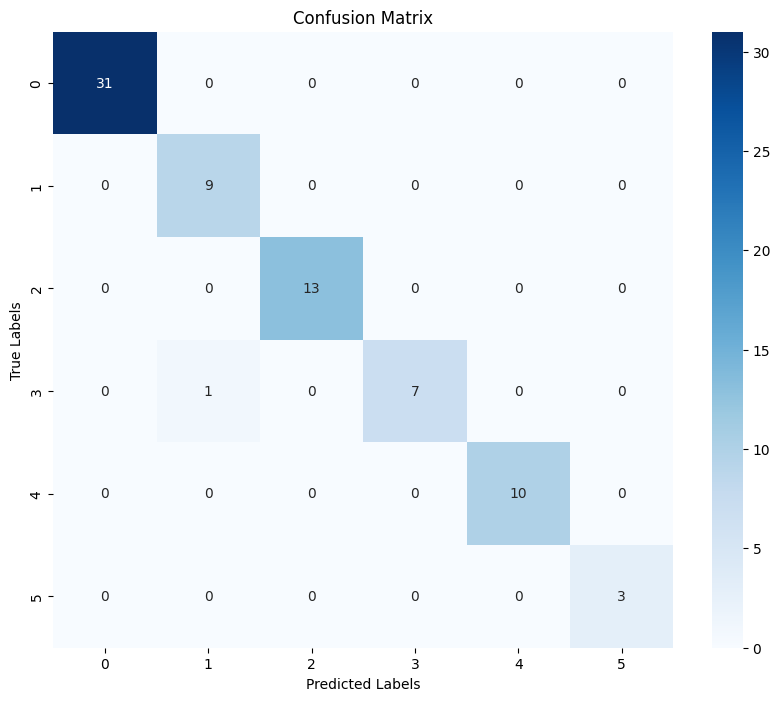

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [8]:
import joblib

# Save the model to a file
joblib.dump(model, 'dermatology_model.pkl')

# Download the model to your local machine
files.download('dermatology_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>